In [1]:
import sys, os 
sys.path.append(os.path.abspath('..'))
from ift6758.data.feature_engineering_one import feature_engineering_one

### Question #1

In [2]:
df = feature_engineering_one(years = range(2016, 2019))
df.head(10)

100%|██████████| 4030/4030 [01:07<00:00, 59.83it/s]


,game_id,season,game_time,period,period_time,event_type,team_id,team_name,coordinates_x,coordinates_y,...,goalie,shot_type,empty_net,strength,situation_code,zone_code,distance_to_net,shot_angle,is_goal,is_empty_net
0,2016020001,20162017,2016-10-12 23:00:00+00:00,1,01:11,shot,10,Maple Leafs,-77.0,5.0,...,Craig Anderson,wrist,False,Even Strength,1551,O,13.000000,-1.725255,0,0
1,2016020001,20162017,2016-10-12 23:00:00+00:00,1,02:53,shot,9,Senators,86.0,13.0,...,Frederik Andersen,wrist,False,Even Strength,1551,O,13.341664,-77.005383,0,0
2,2016020001,20162017,2016-10-12 23:00:00+00:00,1,04:01,shot,9,Senators,23.0,-38.0,...,Frederik Andersen,wrist,False,Even Strength,1551,N,76.157731,29.931512,0,0
3,2016020001,20162017,2016-10-12 23:00:00+00:00,1,04:46,shot,9,Senators,33.0,-15.0,...,Frederik Andersen,slap,False,Even Strength,1551,O,57.974132,14.995079,0,0
4,2016020001,20162017,2016-10-12 23:00:00+00:00,1,06:46,shot,10,Maple Leafs,-34.0,28.0,...,Craig Anderson,wrist,False,Even Strength,1551,O,61.717096,-12.824398,0,0
5,2016020001,20162017,2016-10-12 23:00:00+00:00,1,07:30,shot,10,Maple Leafs,-33.0,-17.0,...,Craig Anderson,wrist,False,Even Strength,1551,O,58.523500,7.932758,0,0
6,2016020001,20162017,2016-10-12 23:00:00+00:00,1,08:21,goal,10,Maple Leafs,-70.0,1.0,...,Craig Anderson,wrist,False,Even Strength,1551,O,19.026298,-0.360346,1,0
7,2016020001,20162017,2016-10-12 23:00:00+00:00,1,08:29,shot,10,Maple Leafs,-45.0,-36.0,...,Craig Anderson,wrist,False,Even Strength,1551,O,56.850682,15.037816,0,0
8,2016020001,20162017,2016-10-12 23:00:00+00:00,1,09:00,shot,9,Senators,33.0,-18.0,...,Frederik Andersen,slap,False,Even Strength,1551,O,58.821765,17.818889,0,0
9,2016020001,20162017,2016-10-12 23:00:00+00:00,1,10:16,shot,9,Senators,34.0,20.0,...,Frederik Andersen,wrist,False,Even Strength,1551,O,58.523500,-19.983107,0,0


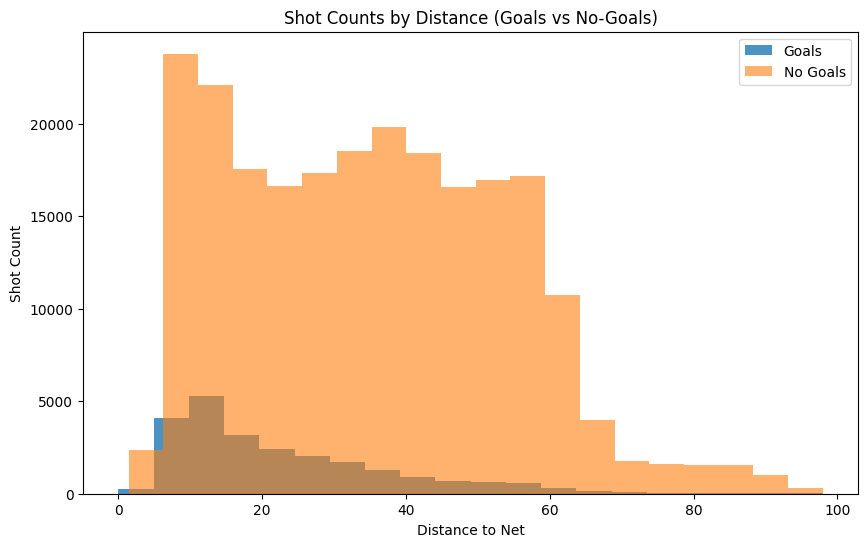

In [3]:
import matplotlib.pyplot as plt

goals = df[df['is_goal'] == 1]
no_goals = df[df['is_goal'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(goals["distance_to_net"], bins=20, alpha=0.8, label="Goals", density=False)
plt.hist(no_goals["distance_to_net"], bins=20, alpha=0.6, label="No Goals", density=False)
plt.xlabel("Distance to Net")
plt.ylabel("Shot Count")
plt.title("Shot Counts by Distance (Goals vs No-Goals)")
plt.legend()
plt.show()

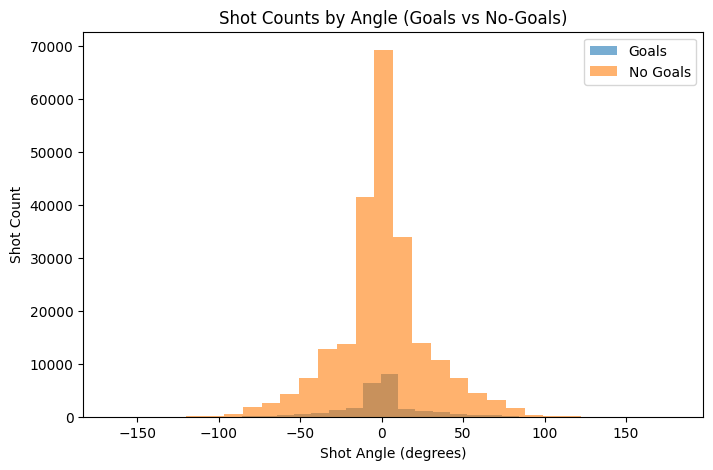

In [4]:
plt.figure(figsize=(8,5))
plt.hist(goals["shot_angle"], bins=30, alpha=0.6, label="Goals", density=False)
plt.hist(no_goals["shot_angle"], bins=30, alpha=0.6, label="No Goals", density=False)
plt.xlabel("Shot Angle (degrees)")
plt.ylabel("Shot Count")
plt.title("Shot Counts by Angle (Goals vs No-Goals)")
plt.legend()
plt.show()

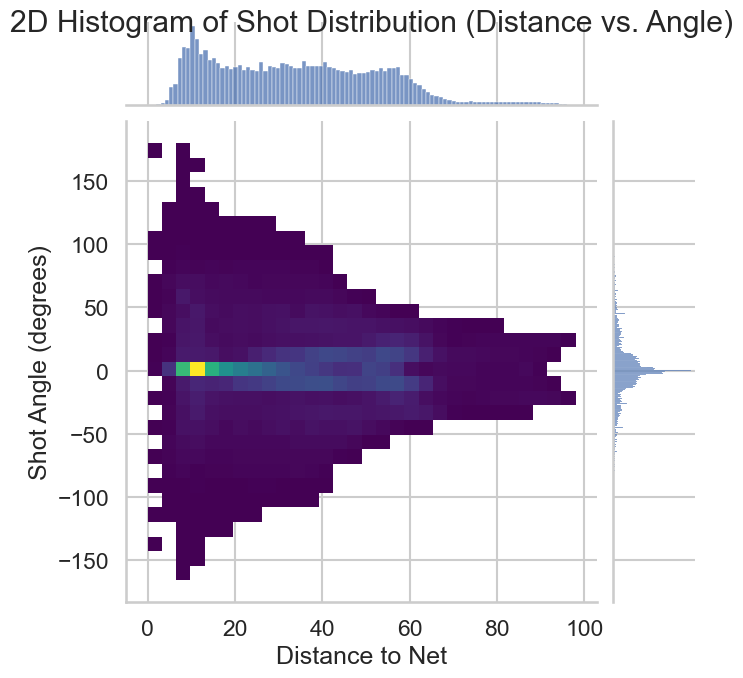

In [5]:
import seaborn as sns

sns.set(style="whitegrid", context="talk")

g = sns.jointplot(
    data=df,
    x="distance_to_net",
    y="shot_angle",
    kind="hist",
    bins=30,
    cmap="viridis",
    height=7,
)

g.set_axis_labels("Distance to Net", "Shot Angle (degrees)")
g.fig.suptitle("2D Histogram of Shot Distribution (Distance vs. Angle)")

plt.show()

### Question #2

In [6]:
import pandas as pd

distance_bins = pd.cut(df["distance_to_net"], bins=30)
angle_bins = pd.cut(df["shot_angle"], bins=30)

goal_rate_by_distance = df.groupby(distance_bins)["is_goal"].mean().reset_index()
goal_rate_by_distance["distance_center"] = goal_rate_by_distance["distance_to_net"].apply(lambda x: x.mid)

goal_rate_by_angle = df.groupby(angle_bins)["is_goal"].mean().reset_index()
goal_rate_by_angle["angle_center"] = goal_rate_by_angle["shot_angle"].apply(lambda x: x.mid)


C:\Users\Goofy\AppData\Local\Temp\ipykernel_16536\1510727828.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_distance = df.groupby(distance_bins)["is_goal"].mean().reset_index()
C:\Users\Goofy\AppData\Local\Temp\ipykernel_16536\1510727828.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_angle = df.groupby(angle_bins)["is_goal"].mean().reset_index()


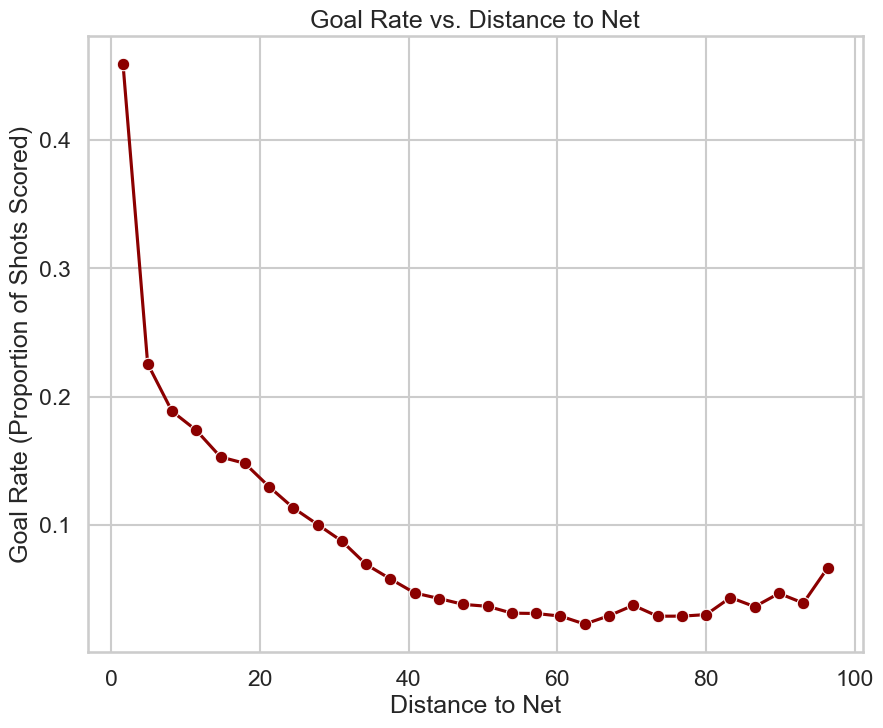

In [7]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 8))
sns.lineplot(
  data=goal_rate_by_distance,
  x="distance_center",
  y="is_goal",
  marker="o",
  color="darkred"
)

plt.title("Goal Rate vs. Distance to Net")
plt.xlabel("Distance to Net")
plt.ylabel("Goal Rate (Proportion of Shots Scored)")
plt.show()

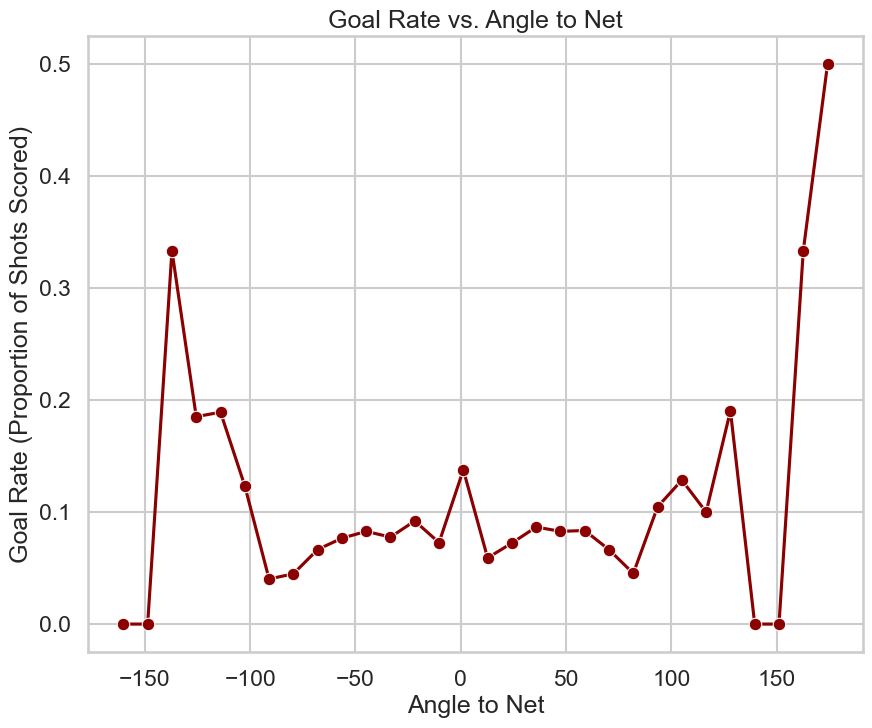

In [8]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 8))
sns.lineplot(
  data=goal_rate_by_angle,
  x="angle_center",
  y="is_goal",
  marker="o",
  color="darkred"
)

plt.title("Goal Rate vs. Angle to Net")
plt.xlabel("Angle to Net")
plt.ylabel("Goal Rate (Proportion of Shots Scored)")
plt.show()

### Question #3

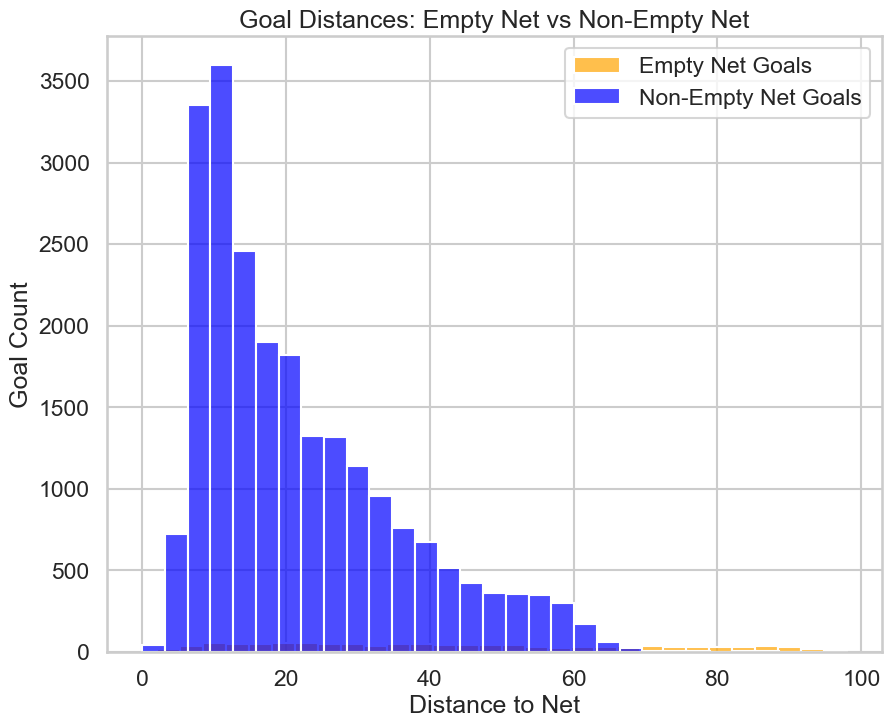

In [9]:
goals_only = df[df['is_goal'] == 1]

empty_net_goals = goals_only[goals_only["empty_net"] == True]
non_empty_net_goals = goals_only[goals_only["empty_net"] == False]

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 8))
sns.histplot(
  data=empty_net_goals,
  x="distance_to_net",
  bins=30,
  color="orange",
  label="Empty Net Goals",
  alpha=0.7
)

sns.histplot(
  data=non_empty_net_goals,
  x="distance_to_net",
  bins=30,
  color="blue",
  label="Non-Empty Net Goals",
  alpha=0.7
)

plt.xlabel("Distance to Net")
plt.ylabel("Goal Count")
plt.title("Goal Distances: Empty Net vs Non-Empty Net")
plt.legend()
plt.show()